In [21]:
from algoshort.yfinance_handler import YFinanceDataHandler
from algoshort.wrappers import generate_signals, calculate_metrics, calculate_return
from algoshort.ohlcprocessor import OHLCProcessor

In [22]:
def TA(symbol, benchmark, cache_dir, config_path):

    handler = YFinanceDataHandler(cache_dir=cache_dir)
    processor = OHLCProcessor()
    # symbols = [symbol, benchmark]
    handler.download_data(symbols=[symbol, benchmark], use_cache=True)
    
    stock_data = processor.calculate_relative_prices(
        stock_data= handler.get_data(symbol=symbol),
        benchmark_data= handler.get_data(symbol=benchmark)
        )
    stock_data, signal_columns = generate_signals(stock_data)
    stock_data = calculate_return(stock_data, config_path=config_path)
    stock_data = calculate_metrics(stock_data, config_path=config_path)
    return stock_data


ta = TA(symbol='A2A.MI', benchmark='FTSEMIB.MI', cache_dir = './cache', config_path='config.json')
ta

2025-09-16 10:30:07,544 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,544 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,544 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,544 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,544 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,544 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,544 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,544 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,544 - algoshort.yfinance_handler.YFinanceDat

Price,date,open,high,low,close,volume,ropen,rhigh,rlow,rclose,...,rtt_5020_tr_roll,rtt_5020_tr,rsma_50100150_pr_roll,rsma_50100150_pr,rsma_50100150_tr_roll,rsma_50100150_tr,rema_50100150_pr_roll,rema_50100150_pr,rema_50100150_tr_roll,rema_50100150_tr
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,12496412,0.7768,0.7806,0.7630,0.7655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,9773848,0.7626,0.7682,0.7521,0.7651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,12137840,0.7823,0.7931,0.7779,0.7811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,17878384,0.7804,0.8003,0.7676,0.7984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,14424671,0.8119,0.8204,0.8048,0.8061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,5032625,1.0575,1.0590,1.0465,1.0465,...,1.133566,5.0,1.093343,1.047276,1.897981,1.848680,1.165125,1.108358,1.533067,5.0
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,5528723,1.0380,1.0434,1.0375,1.0424,...,1.133566,5.0,1.091751,1.047501,1.897981,1.852810,1.163479,1.108589,1.533067,5.0
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,6680848,1.0406,1.0436,1.0337,1.0436,...,1.133566,5.0,1.094116,1.047687,1.897981,1.853060,1.165953,1.108780,1.533067,5.0
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,6168797,1.0369,1.0501,1.0369,1.0413,...,1.133566,5.0,1.096779,1.048206,1.902260,1.854934,1.168708,1.109315,1.533067,5.0


In [23]:
from algoshort.regime_fc import Regime_fc
regime_fc = Regime_fc()
ta = regime_fc.swings(ta, rel=True, config_path='./config.json')
ta = regime_fc.regime(ta, rel=True, config_path='./config.json')
ta

2025-09-16 10:30:07,626 - algoshort.regime_fc.Regime_fc - INFO - Initialized regime_fc swing analyzer
2025-09-16 10:30:07,626 - INFO - Initialized regime_fc swing analyzer
2025-09-16 10:30:07,626 - algoshort.regime_fc.Regime_fc - INFO - Starting swings analysis (rel=True)
2025-09-16 10:30:07,626 - INFO - Starting swings analysis (rel=True)
2025-09-16 10:30:07,635 - algoshort.regime_fc.Regime_fc - INFO - Starting historical_swings analysis
2025-09-16 10:30:07,635 - INFO - Starting historical_swings analysis
2025-09-16 10:30:07,655 - algoshort.regime_fc.Regime_fc - INFO - historical_swings completed with 4 swing levels
2025-09-16 10:30:07,655 - INFO - historical_swings completed with 4 swing levels
2025-09-16 10:30:07,668 - algoshort.regime_fc.Regime_fc - INFO - Completed swings analysis
2025-09-16 10:30:07,668 - INFO - Completed swings analysis
2025-09-16 10:30:07,670 - algoshort.regime_fc.Regime_fc - INFO - Starting regime analysis (rel=True)
2025-09-16 10:30:07,670 - INFO - Starting r

Price,date,open,high,low,close,volume,ropen,rhigh,rlow,rclose,...,rl2,rh3,rl3,rh4,rl4,rrt,rrg,rflr,rclg,rrg_ch
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,12496412,0.7768,0.7806,0.7630,0.7655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,9773848,0.7626,0.7682,0.7521,0.7651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,12137840,0.7823,0.7931,0.7779,0.7811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,17878384,0.7804,0.8003,0.7676,0.7984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,14424671,0.8119,0.8204,0.8048,0.8061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,5032625,1.0575,1.0590,1.0465,1.0465,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,1.0766
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,5528723,1.0380,1.0434,1.0375,1.0424,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,1.0766
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,6680848,1.0406,1.0436,1.0337,1.0436,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,1.0766
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,6168797,1.0369,1.0501,1.0369,1.0413,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,1.0766


In [24]:
ta.describe()

Price,date,open,high,low,close,volume,ropen,rhigh,rlow,rclose,...,rl2,rh3,rl3,rh4,rl4,rrt,rrg,rflr,rclg,rrg_ch
count,2466,2466.000000,2466.000000,2466.000000,2466.000000,2.466000e+03,2466.000000,2466.000000,2466.000000,2466.000000,...,81.000000,16.000000,16.000000,4.000000,5.000000,1.0000,2216.000000,5.000000,4.000000,2216.000000
mean,2020-11-05 18:07:17.956204544,1.252920,1.265294,1.239803,1.252619,1.031165e+07,1.041094,1.051652,1.029855,1.040751,...,0.989111,1.175031,0.945206,1.265250,0.881080,1.0634,-0.065433,0.838660,1.210550,1.001631
min,2016-01-04 00:00:00,0.600429,0.612313,0.586357,0.597928,2.899119e+06,0.719500,0.742200,0.713400,0.734000,...,0.713400,1.005100,0.807500,1.218400,0.807500,1.0634,-1.000000,0.713400,1.064600,0.826700
25%,2018-06-04 06:00:00,0.972313,0.982313,0.961926,0.972313,6.822938e+06,0.948600,0.958550,0.938900,0.949325,...,0.912000,1.079675,0.879150,1.261975,0.856800,1.0634,-1.000000,0.807500,1.179950,0.943100
50%,2020-11-07 12:00:00,1.119044,1.128296,1.108042,1.119003,9.107348e+06,1.045000,1.055650,1.032950,1.043550,...,0.989600,1.189400,0.952600,1.279600,0.885900,1.0634,0.000000,0.817200,1.247450,1.013800
75%,2023-04-05 18:00:00,1.487814,1.501492,1.474187,1.489588,1.233620e+07,1.133675,1.143275,1.122200,1.132450,...,1.071700,1.277600,1.017250,1.282875,0.889600,1.0634,1.000000,0.889600,1.278050,1.066000
max,2025-09-12 00:00:00,2.353000,2.386000,2.339000,2.361000,5.520667e+07,1.333700,1.338900,1.269500,1.278500,...,1.220900,1.338900,1.076600,1.283400,0.965600,1.0634,1.000000,0.965600,1.282700,1.204400
std,NaN,0.403304,0.405799,0.400690,0.403332,5.238536e+06,0.115654,0.115915,0.115144,0.115288,...,0.109878,0.106524,0.085980,0.031387,0.057539,NaN,0.941041,0.094644,0.101519,0.086683


In [25]:
handler = YFinanceDataHandler(cache_dir='./cache')
handler.download_data(symbols=['A2A.MI', 'FTSEMIB.MI'])
stock_data = handler.get_ohlc_data('A2A.MI')
stock_data

2025-09-16 10:30:07,785 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,785 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,785 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,785 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,785 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,785 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,785 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,785 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 2, Downloads needed: 0
2025-09-16 10:30:07,785 - algoshort.yfinance_handler.YFinanceDat

Price,date,open,high,low,close
0,2016-01-04,0.776806,0.780559,0.763046,0.765548
1,2016-01-05,0.771802,0.777431,0.761169,0.774304
2,2016-01-06,0.770551,0.781184,0.766173,0.769300
3,2016-01-07,0.759919,0.779308,0.747410,0.777431
4,2016-01-08,0.778057,0.786187,0.771177,0.772428
...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000


In [26]:
relative = False

In [27]:
regime_fc = Regime_fc()
stock_data = regime_fc.historical_swings(stock_data, relative=relative)
stock_data

2025-09-16 10:30:09,841 - algoshort.regime_fc.Regime_fc - INFO - Initialized regime_fc swing analyzer
2025-09-16 10:30:09,841 - INFO - Initialized regime_fc swing analyzer
2025-09-16 10:30:09,841 - algoshort.regime_fc.Regime_fc - INFO - Starting historical_swings analysis
2025-09-16 10:30:09,841 - INFO - Starting historical_swings analysis
2025-09-16 10:30:09,859 - algoshort.regime_fc.Regime_fc - INFO - historical_swings completed with 4 swing levels
2025-09-16 10:30:09,859 - INFO - historical_swings completed with 4 swing levels


Price,date,open,high,low,close,hi1,lo1,hi2,lo2,hi3,lo3,hi4,lo4
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,0.786187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,NaN,2.102,NaN,NaN,NaN,NaN,NaN,NaN
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
from algoshort.utils import load_config, regime_args, lower_upper_OHLC
config = load_config('./config.json')

In [36]:
rt_lo, rt_hi, slo, shi, rg, clg, flr, rg_ch = regime_args(stock_data, config['floor_ceiling']['lvl'], relative=relative)
rt_lo, rt_hi, slo, shi, rg, clg, flr, rg_ch

('lo1', 'hi1', 'lo3', 'hi3', 'rg', 'clg', 'flr', 'rg_ch')

In [37]:
stock_data = regime_fc.cleanup_latest_swing(stock_data,shi,slo,rt_hi,rt_lo)
stock_data

Price,date,open,high,low,close,hi1,lo1,hi2,lo2,hi3,lo3,hi4,lo4
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,0.786187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,NaN,2.102,NaN,NaN,NaN,NaN,NaN,NaN
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
_o, _h, _l, _c = lower_upper_OHLC(stock_data, relative=relative)
_o, _h, _l, _c

('open', 'high', 'low', 'close')

In [43]:
ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt = regime_fc.latest_swing_variables(stock_data, shi,slo,rt_hi,rt_lo,_h,_l, _c)
ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt

(-1,
 np.float64(2.385999917984009),
 np.int64(2401),
 'hi1',
 'lo3',
 np.float64(2.071000099182129),
 2458)

In [49]:
vlty = round(regime_fc.average_true_range(stock_data,_h,_l,_c, n= config['floor_ceiling']['vlty_n'])[hh_ll_dt],2)
vlty
dist_vol = 5 * vlty
dist_vol

np.float64(0.15)

In [50]:
_sign = regime_fc.test_distance(ud,bs, hh_ll, dist_vol, config['floor_ceiling']['dist_pct'])
_sign

-1

In [51]:
stock_data = regime_fc.retest_swing(stock_data, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg)
stock_data

Price,date,open,high,low,close,hi1,lo1,hi2,lo2,hi3,lo3,hi4,lo4,rt
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,0.786187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,NaN,2.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
retrace_vol = config['floor_ceiling']['r_vol'] * vlty
retrace_vol

np.float64(0.075)

In [53]:
stock_data = regime_fc.retracement_swing(stock_data, _sign, _swg, _c, hh_ll_dt, hh_ll, vlty, retrace_vol, config['floor_ceiling']['retrace_pct'])
stock_data

Price,date,open,high,low,close,hi1,lo1,hi2,lo2,hi3,lo3,hi4,lo4,rt
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,0.786187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,NaN,2.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
stdev = stock_data[_c].rolling(config['floor_ceiling']['vlty_n']).std(ddof=0)
stdev

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2461    0.064456
2462    0.062602
2463    0.060745
2464    0.057443
2465    0.054786
Name: close, Length: 2466, dtype: float64

In [55]:
stock_data = regime_fc.regime_floor_ceiling(stock_data, _h, _l, _c, slo, shi, flr, clg, rg, rg_ch, stdev, config['floor_ceiling']['threshold'])
stock_data

2025-09-16 10:53:26,369 - algoshort.regime_fc.Regime_fc - INFO - Starting regime_floor_ceiling analysis
2025-09-16 10:53:26,369 - INFO - Starting regime_floor_ceiling analysis
2025-09-16 10:53:26,383 - algoshort.regime_fc.Regime_fc - INFO - regime_floor_ceiling completed
2025-09-16 10:53:26,383 - INFO - regime_floor_ceiling completed


Price,date,open,high,low,close,hi1,lo1,hi2,lo2,hi3,lo3,hi4,lo4,rt,rg,flr,clg,rg_ch
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,0.786187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.114347
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,NaN,2.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.114347
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.114347
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.114347


In [56]:
from algoshort.plots import *

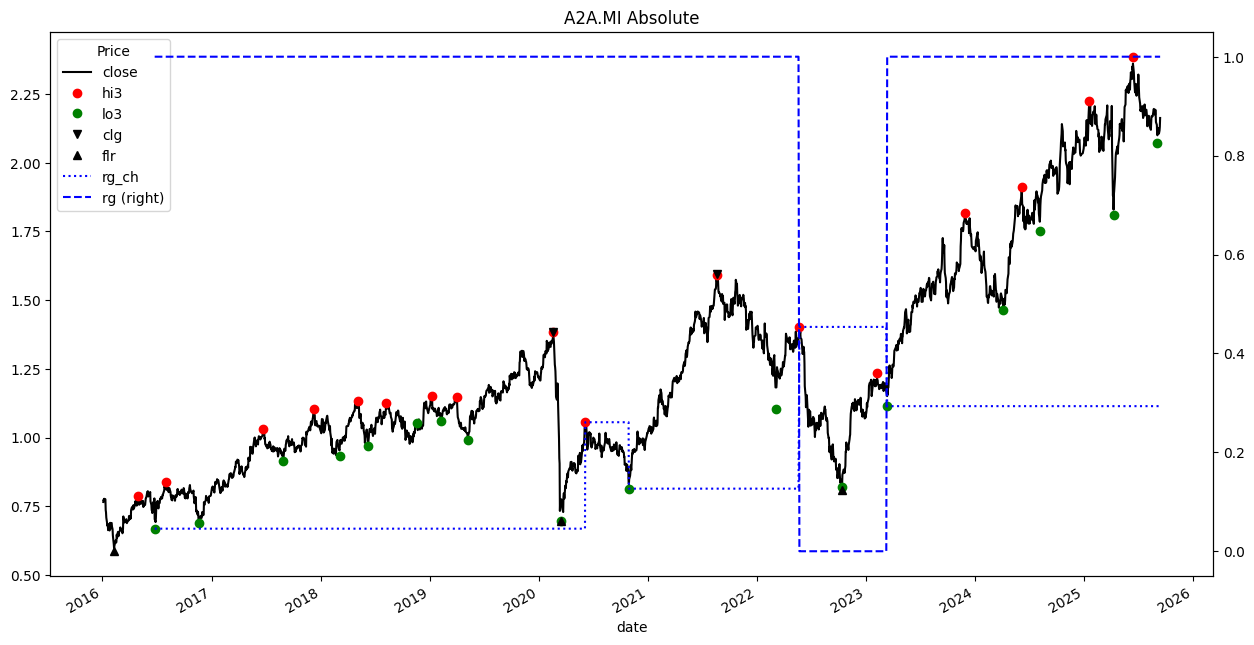

In [57]:
plot_signal_abs(stock_data, ticker='A2A.MI')